In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import cvxpy as cp
def dset():
    mean1 = [-3, 3]  # mean value
    cov = [[0.4, 0], [0, 0.4]]  # covariance matrix
    s = 6
    # Generate two-dimensional Gaussian random numbers
    X_train1 = np.random.multivariate_normal(mean1, cov, s)
    mean2 = [3, -3]  # mean value
    # Generate two-dimensional Gaussian random numbers
    X_train2 = np.random.multivariate_normal(mean2, cov, s)
    
    # add four support vecters
    r = np.array([[-0.5,1],[0.5,-1],[1.5,3],[-1.5,-3]])
    X_train = np.insert(X_train2, 0, X_train1, axis=0)
    X_train = np.insert(X_train, 0, r, axis=0)
    print(X_train)
    
    # add label of four support vecters
    v = np.array([1, -1, 1, -1])
    Y = -1 * np.ones(s)
    Y = np.insert(Y, 0, np.ones(s), axis=0)
    Y = np.insert(Y, 0, v, axis=0)
    print(Y)
    Y_train = np.reshape(Y, (len(Y), 1))
    return  X_train,Y_train


# Generate a toy dataset sample size is 16 dim size is 2
n_samples = 16
dim = 2
X_train, Y_train = dset()

print(X_train)
n_samples=n_samples+4
n_features_list = np.arange(3, dim+1, 10)
costs =[]
distances2 = []

# SVM model
def SVM(x_train, y_train):
    s_s = cp.Variable((x_train.shape[1], 1))

    objective = cp.Minimize(0.5*cp.norm(s_s) ** 2)
    constraints = [cp.multiply(y_train, x_train @ s_s) >= 1]
    prob = cp.Problem(objective, constraints)

    prob.solve()
    s_s_value = s_s.value
    return s_s_value

# logistic loss function
def LogisticLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    Xw = np.matmul(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)

    f = np.mean(np.logaddexp(0, -yXw))
    gMul = np.exp(-yXw)/(1 + np.exp(-yXw))
    ymul = -1*yT*gMul
    g = np.matmul(ymul.reshape(1, -1), X)
    g = g.reshape(-1, 1)
    return [f, g]

# logistic regression
def model_logloss(x_train, y_train, num_iterations=20000, learning_rate=0.5):
    w_log = np.zeros((x_train.shape[1], 1))  # GRADED FUNCTION: initialize_with_zeros

    # Gradient descent
    # GRADED FUNCTION: optimize
    for i in range(num_iterations):
        # GRADED FUNCTION: propagate

        [cost, dw_log] = LogisticLoss(w_log, x_train, y_train, 1)
        w_log = w_log - learning_rate * dw_log

        # Print the cost every 100000 training examples
        if i % 100000 == 0:
            costs.append(cost)
        if 1 and i % 100000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    return w_log

# logistic regression model
w_log = model_logloss(X_train, Y_train, num_iterations=2000000, learning_rate=0.08)

# hard margin SVM model
w_s = SVM(X_train, Y_train)

# compute the norm the weights
w_log_norm = w_log/np.linalg.norm(w_log)
w_s = w_s/np.linalg.norm(w_s)




[[-0.5         1.        ]
 [ 0.5        -1.        ]
 [ 1.5         3.        ]
 [-1.5        -3.        ]
 [-3.50674028  3.05061525]
 [-2.91525733  4.24738075]
 [-4.29811775  3.38018283]
 [-2.65711655  3.20647455]
 [-3.53012616  3.51879432]
 [-3.07252049  2.62115884]
 [ 2.95707117 -3.24287146]
 [ 2.81473605 -3.90547715]
 [ 2.80750499 -2.66912325]
 [ 2.85449873 -2.28822871]
 [ 3.4624784  -1.68029627]
 [ 2.15203393 -3.29350197]]
[ 1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
[[-0.5         1.        ]
 [ 0.5        -1.        ]
 [ 1.5         3.        ]
 [-1.5        -3.        ]
 [-3.50674028  3.05061525]
 [-2.91525733  4.24738075]
 [-4.29811775  3.38018283]
 [-2.65711655  3.20647455]
 [-3.53012616  3.51879432]
 [-3.07252049  2.62115884]
 [ 2.95707117 -3.24287146]
 [ 2.81473605 -3.90547715]
 [ 2.80750499 -2.66912325]
 [ 2.85449873 -2.28822871]
 [ 3.4624784  -1.68029627]
 [ 2.15203393 -3.29350197]]
Cost after iteration 0: 0.693147
Cost after iteration 100000: 0.0000

0.004025272582704187
[-0.5  0.5  1.5 -1.5]
[ 1. -1.  3. -3.]


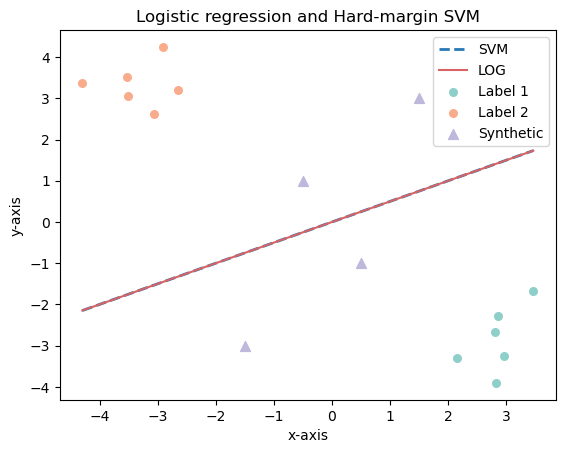

In [94]:
#  the four support vectors
r =np.array([[-0.5,1],[0.5,-1],[1.5,3],[-1.5,-3]])
# the distance between of the coeficients of SVM and the coeficients of logistcic model
distance2 = np.linalg.norm(w_log_norm[0]/w_log_norm[1]-w_s[0]/w_s[1])

lim = 4.5
xp = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)

# the decision boundary of the 
yp = - (w_s[0] * xp) / w_s[1]
yp1 = - (w_log_norm[0] * xp) / w_log_norm[1]

idx0 = np.where(Y_train == -1)
idx1 = np.where(Y_train == 1)

plt.scatter(X_train[idx0[0][2:], 0],X_train[idx0[0][2:], 1],marker = "o",s=30, label='Label 1',c='#8ECFC9')
plt.scatter(X_train[idx1[0][2:], 0],X_train[idx1[0][2:], 1],marker = "o",s=30, label='Label 2',c='#F8AC8C')
plt.plot(xp, yp, '--', label='SVM',c='#2878B5',linewidth =2)

plt.plot(xp, yp1, '-', label='LOG',c='#D76364')

plt.scatter(r[:,0],r[:,1],marker = "^",s=50, label='Synthetic',c='#BEB8DC')

plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.title('Logistic regression and Hard-margin SVM')
plt.legend()
plt.savefig('CG_LOGSVM_2D.jpg', dpi=300)
plt.show()